In [8]:
import autograd.numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from autograd import grad, jacobian, hessian, elementwise_grad


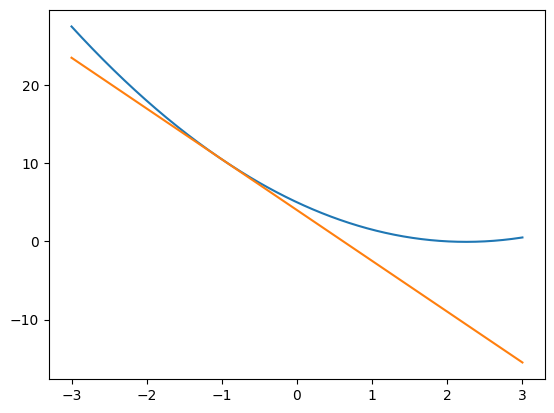

In [46]:
x = np.linspace(-3, 3, 300)

def sigmoid(x):
    return (2 - x) ** 2 - 0.5 * x + 1
    #return 1 / (1 + np.exp(-x))

def tangent(f, x, order=1):
    x, coefs = float(x), []
    for i in range(order + 1):
        coefs.append(f(x))
        f = grad(f)

    def tf(a):
        output = 0.
        for i, c in enumerate(coefs):
            output += c * (a - x) ** i
        return output
    return tf

def tangent(f, x):
    y = f(x)
    slope = grad(f)(x)

    def tf(a):
        return (a - x) * slope + y

    return tf

def tangent2(f, x):
    y = f(x)
    slope = grad(f)(x)
    curve = 0.5 * grad(grad(f))(x)

    def tf(a):
        return curve * (a - x) ** 2 + (a - x) * slope + y

    return tf


dsigmoid = elementwise_grad(sigmoid)
d2sigmoid = elementwise_grad(dsigmoid)

point = -1.
tpoint = tangent(sigmoid, point)


plt.plot(x, sigmoid(x))
plt.plot(x, tpoint(x))
#plt.plot(x, d2sigmoid(x))